<a href="https://colab.research.google.com/github/zeeshansalim1234/Pason-DataScience/blob/main/pason.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [18]:
import pandas as pd 
import matplotlib.pyplot as plt

# Creating Pandas DataFrame

In [19]:
df_drilling = pd.read_csv('drillingdata.csv')

# Caluculating Drilling and Connection Times

In [7]:
total_time=len(df_drilling)  # Gives Overall Time of the operation

In [23]:
time_connection=(df_drilling['WeightOnBit_klbs']==0).sum() # Gives Total connection time

In [9]:
time_drilling= total_time-time_connection # Gives Total Drilling Time
print("Time spent drilling: "+str(time_drilling)+"s")
print("Time spent making connections: "+str(time_connection)+"s")

Time spent drilling: 7569s
Time spent making connections: 2431s


# Functions for Visualization of Results

In [20]:
def scatterplot(temp_dict):
  plt.figure(figsize=(10,8))
  plt.title('Scatter Plot\n', fontsize=20)
  plt.xlabel('Weight On Bit (Klbs)', fontsize=15)
  plt.ylabel('Rate of Penetration (ft/s)', fontsize=15)
  plt.scatter(temp_dict.values(), temp_dict.keys())
  plt.show()

def bargraph(temp_dict):
  plt.figure(figsize=(10,8))
  plt.title('Bar Graph\n', fontsize=20)
  plt.xlabel('Weight On Bit (Klbs)', fontsize=15)
  plt.ylabel('Rate of Penetration (ft/s)', fontsize=15)
  plt.bar(temp_dict.values(), temp_dict.keys())
  plt.show()



# Function to calculate ROP and Optimal Weight On Bits

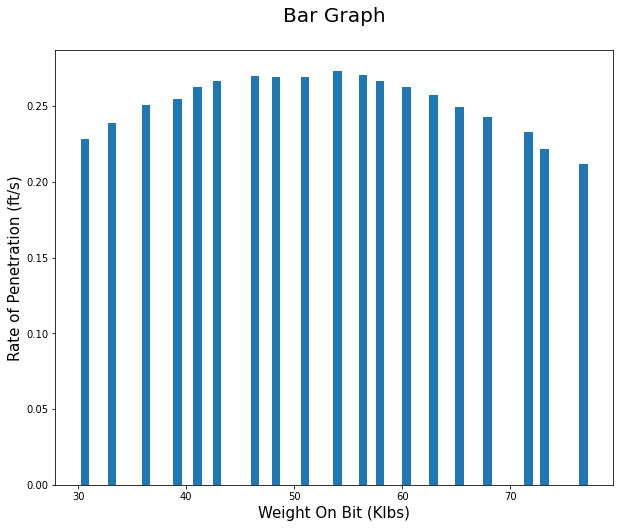

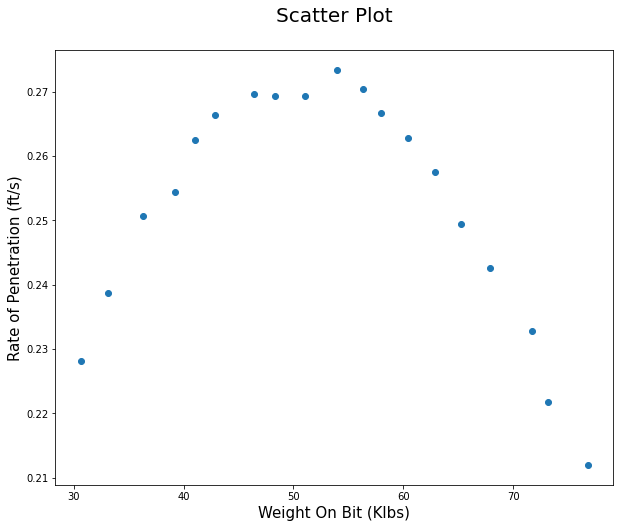





Average Rate of Penetartion: 0.253 ft/s
Maximum Rate of Penetartion: 0.273 ft/s
Optimal Weight on Bit: 53.989 klbs


In [21]:
def calculate_average_ROP():

  ROP_and_weightOnBit={}  #stores ROP and weightOnBit for each drilling period
  start_depth=0           # stores depth at start of each drilling period
  end_depth=0             # stores depth at end of each drilling period
  count_drilling_time=0   # stores time for each drilling period     
  weights_each_period=[]  # stores all weight on bit during each drilling period


  for i in range(0,len(df_drilling)):
    
    if(df_drilling['WeightOnBit_klbs'][i]!=0):  # checks if we are in drilling period

      count_drilling_time+=1  
      weights_each_period.append(df_drilling['WeightOnBit_klbs'][i])
      
      if(df_drilling['WeightOnBit_klbs'][i-1]==0):  # gets the depth at the start of period
        start = df_drilling['HoleDepth_ft'][i]
      elif(df_drilling['WeightOnBit_klbs'][i+1]==0):  # gets the depth at the end of period
        end = df_drilling['HoleDepth_ft'][i]

    elif(i!=0 and df_drilling['WeightOnBit_klbs'][i]==0 and df_drilling['WeightOnBit_klbs'][i-1]!=0) : 
      #if we reached end of the period append ROP as key and median weight of drilling period as item
      ROP_and_weightOnBit[(end-start)/count_drilling_time] = weights_each_period[int(len(weights_each_period)/2)]

    else: # sets counter and weights to 0 if not drilling
      count_drilling_time=0
      weights_each_period=[]

  sum=0
  for key in ROP_and_weightOnBit:
    sum+=key

  bargraph(ROP_and_weightOnBit)
  print("\n\n\n")
  scatterplot(ROP_and_weightOnBit)
  print("\n\n\n")
  print("Average Rate of Penetartion: "+str(round(sum/len(ROP_and_weightOnBit),3))+" ft/s")
  print("Maximum Rate of Penetartion: "+str(round(max(ROP_and_weightOnBit),3))+" ft/s")
  print("Optimal Weight on Bit: "+str(round(ROP_and_weightOnBit[max(ROP_and_weightOnBit)],3))+" klbs")
  

calculate_average_ROP()